In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df=pd.read_csv("updated_dating.csv")

In [76]:
df.head()

,Unnamed: 0,gender,age,income,career,dec,attr,sinc,intel,fun,amb,like
0,0,0,21.0,69487.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,7.0
1,1,0,21.0,69487.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,7.0
2,2,0,21.0,69487.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0
3,3,0,21.0,69487.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,7.0
4,4,0,21.0,69487.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0


In [77]:
newdf=df.drop(["gender",'age','income','career','sinc','intel','amb','like'],axis=1)

In [78]:
newdf=newdf.drop("Unnamed: 0",axis=1)

In [79]:
newdf.head()

,dec,attr,fun
0,1,6.0,7.0
1,1,7.0,8.0
2,1,5.0,8.0
3,1,7.0,7.0
4,1,5.0,7.0


In [80]:
X=newdf.loc[:,['attr','fun']]
#attr and fun are independent variables.
Y=newdf.loc[:,"dec"]
#dec is dependent variable.

In [81]:
#splitting the data into train_split and test_split.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [82]:
print(X_train.shape)
print(X_test.shape)

(5632, 2)
(1408, 2)


In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

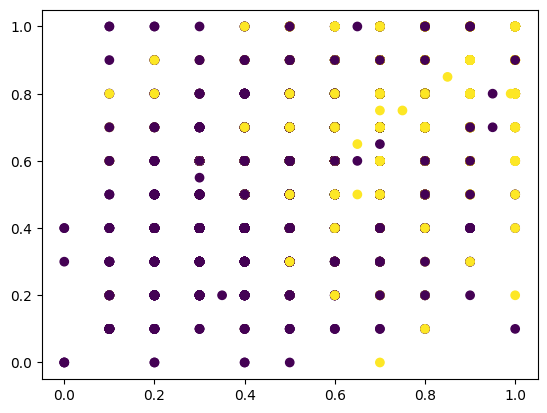

In [84]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)



In [85]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(X_train,Y_train)
#predicting test results 
Y_pred=classifier.predict(X_test)

In [86]:
from sklearn import metrics 
print("Accuracy score(linear-defualt):")
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy score(linear-defualt):
0.734375


In [87]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",C=10,random_state=0)
classifier.fit(X_train,Y_train)
#predicting test results 
Y_pred=classifier.predict(X_test)

In [88]:
from sklearn import metrics 
print("Accuracy score(linear-customised):")
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy score(linear-customised):
0.7365056818181818


In [89]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(X_train,Y_train)
#predicting test results 
Y_pred=classifier.predict(X_test)

In [90]:
from sklearn import metrics 
print("Accuracy score(default_rbf):")
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy score(default_rbf):
0.7350852272727273


In [91]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",gamma=2,C=1,random_state=0)
classifier.fit(X_train,Y_train)
#predicting test results 
Y_pred=classifier.predict(X_test)

In [92]:
from sklearn import metrics 
print("Accuracy score(rbf(customised)):")
print(metrics.accuracy_score(Y_test,Y_pred))

Accuracy score(rbf(customised)):
0.7393465909090909


In [93]:
from sklearn.inspection import DecisionBoundaryDisplay

Text(0.5, 1.0, 'DecisionBoundary plot')

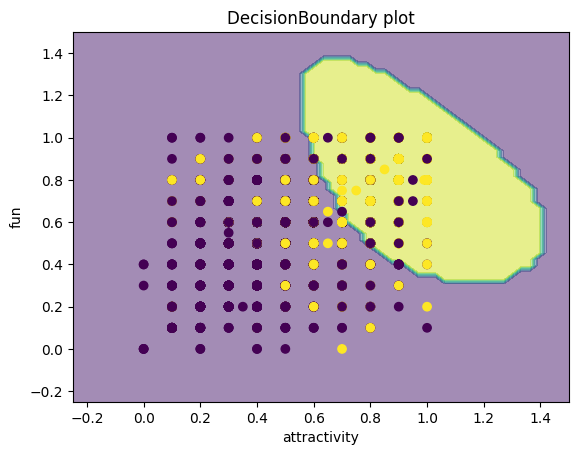

In [94]:
disp=DecisionBoundaryDisplay.from_estimator(classifier,X_train,response_method="predict",alpha=0.5)
disp.ax_.scatter(X_train[:,0],X_train[:,1],c=Y_train)
disp.ax_.set_xlim(-0.25, 1.5)
disp.ax_.set_ylim(-0.25, 1.5)
disp.ax_.set_xlabel("attractivity")
disp.ax_.set_ylabel("fun")
disp.ax_.set_title("DecisionBoundary plot")